In [102]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [103]:
!kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [104]:
from zipfile import ZipFile
zip=ZipFile("gtzan-dataset-music-genre-classification.zip", "r");
zip.printdir()
zip.extractall()

File Name                                             Modified             Size
Data/features_30_sec.csv                       2020-03-24 14:07:02      1108271
Data/features_3_sec.csv                        2020-03-24 14:07:02     11075018
Data/genres_original/blues/blues.00000.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00001.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00002.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00003.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00004.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00005.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00006.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00007.wav     2020-03-24 14:07:12      1323632
Data/genres_original/blues/blues.00008.wav     2020-03-24 14:07:14      1323632
Data/genres_original/blues/blues.00009.w

Visualize Single Audio

In [105]:
random_file_name = "./blues.00000.wav"

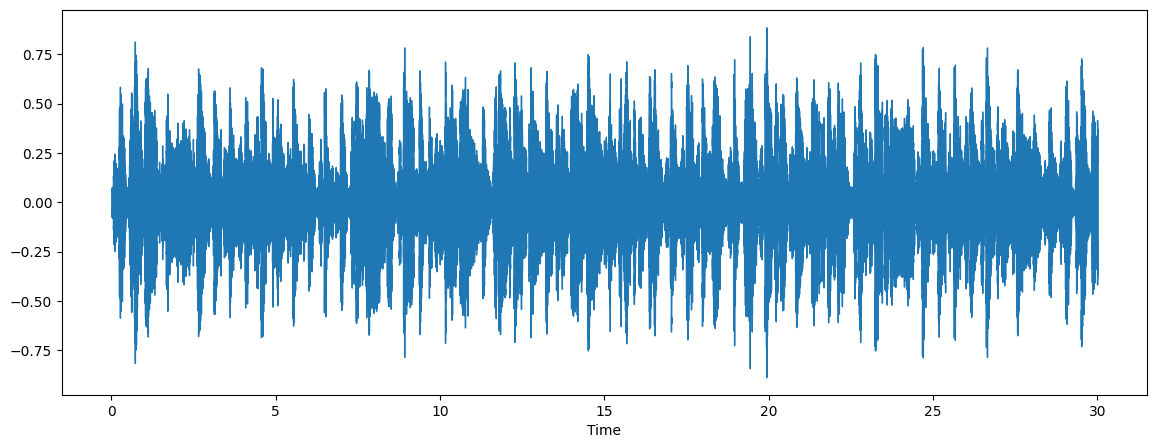

In [106]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [107]:
y.shape

(1323588,)

Playing Sound

In [108]:
from IPython.display import Audio
Audio(data=y,rate=sr)

Doing Visualization on chunks of Audio

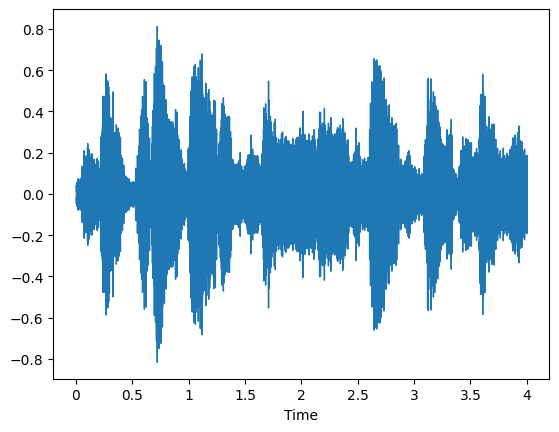

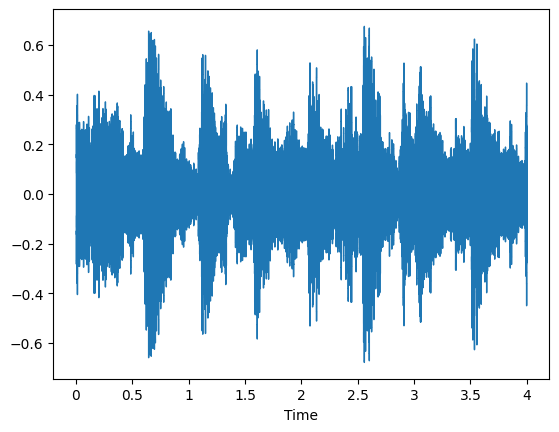

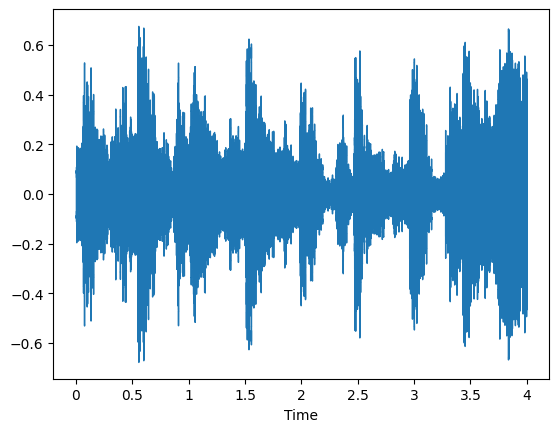

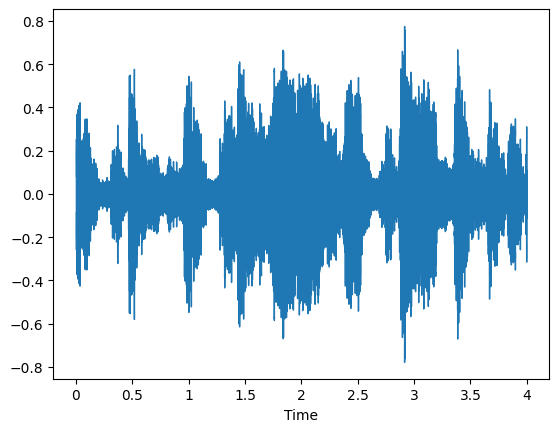

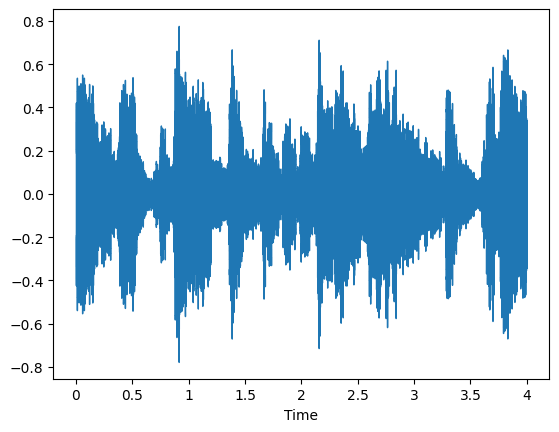

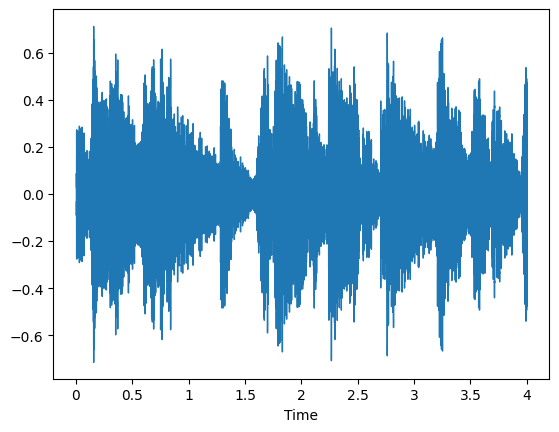

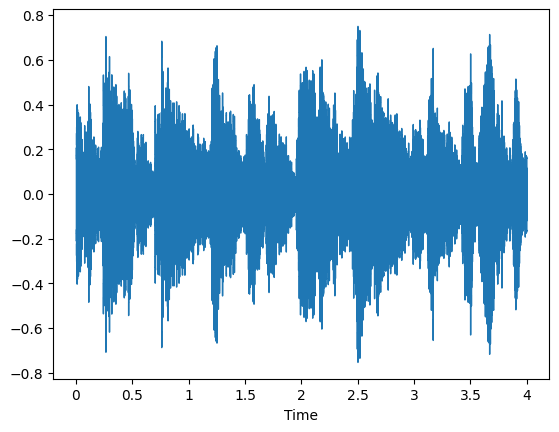

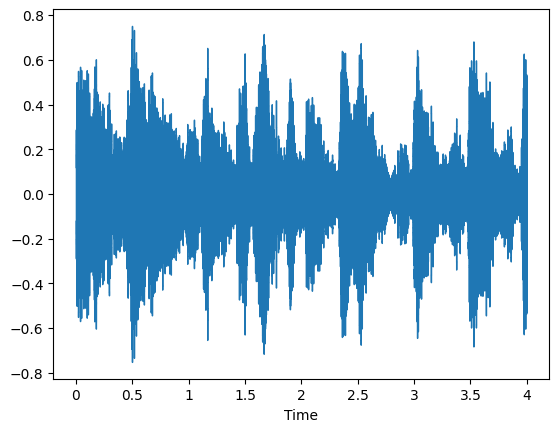

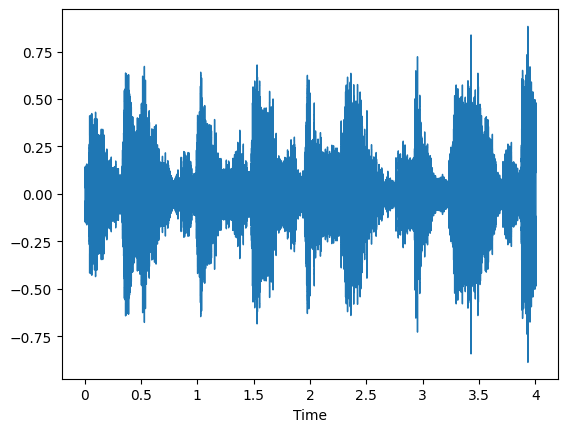

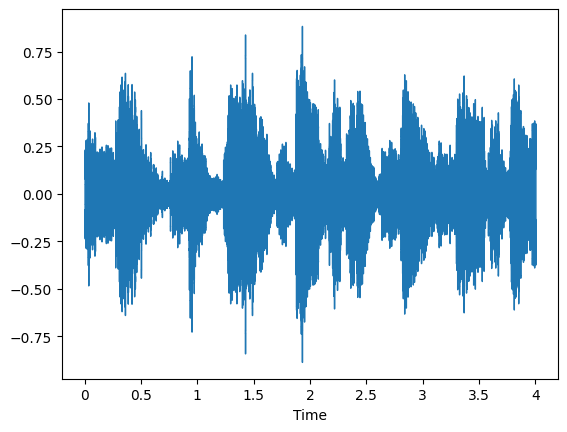

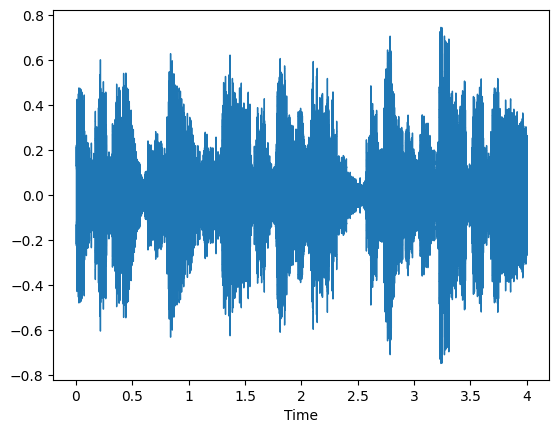

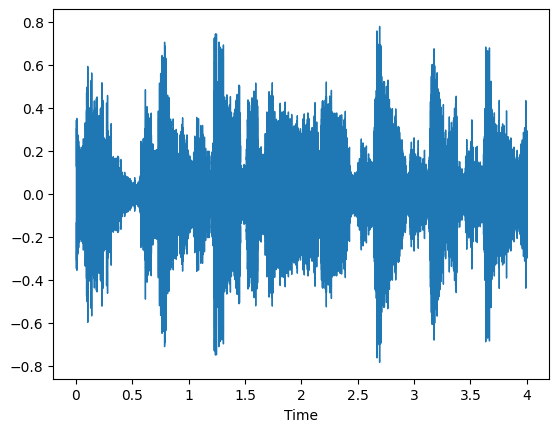

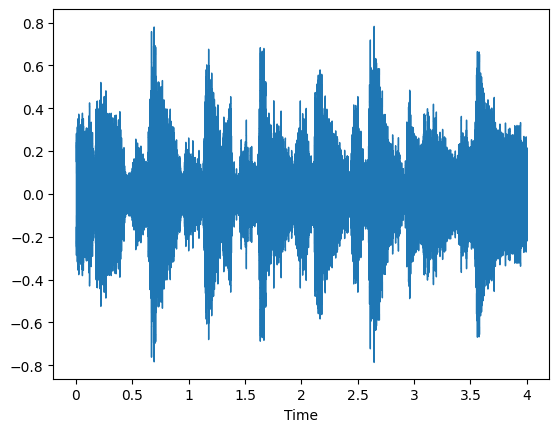

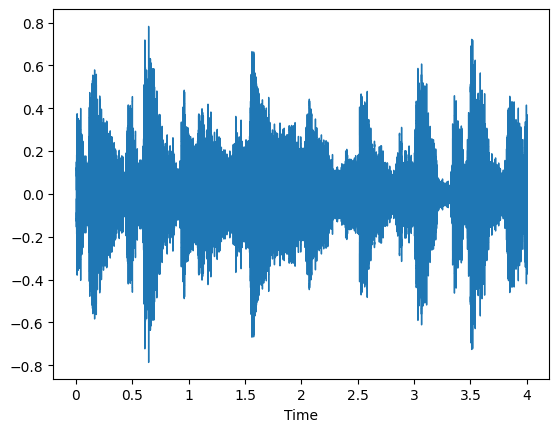

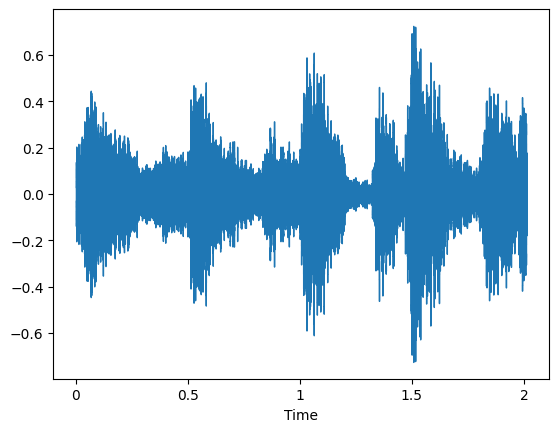

In [109]:
audio_path = "./blues.00000.wav"
y,sr = librosa.load(audio_path,sr=None) #sr=None means original sampling rate

#define duration of chunk and overlap
chunk_duration = 4
overlap_duration = 2

#Convert duartion to sample
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr


#Calculate the number of chunks
num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

#Iterate over each chunk

for i in range (num_chunks):
    #Calculate start and end indices of each chunk
    start = i*(chunk_samples-overlap_samples)
    end = start + chunk_samples
    #Extract the chunk Audio
    chunk = y[start:end]
    plt.Figure(figsize=(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()

Melspectogram Visualization

In [110]:
#Plotting  Melspectogram of entire Audio
def plot_melspectogram(y,sr):
    #Compute Spectogram
    spectogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibles (log scale)
    spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
    #Visualize spectogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Melspectogram')
    plt.tight_layout()
    plt.show()

In [111]:
random_file_name = "./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

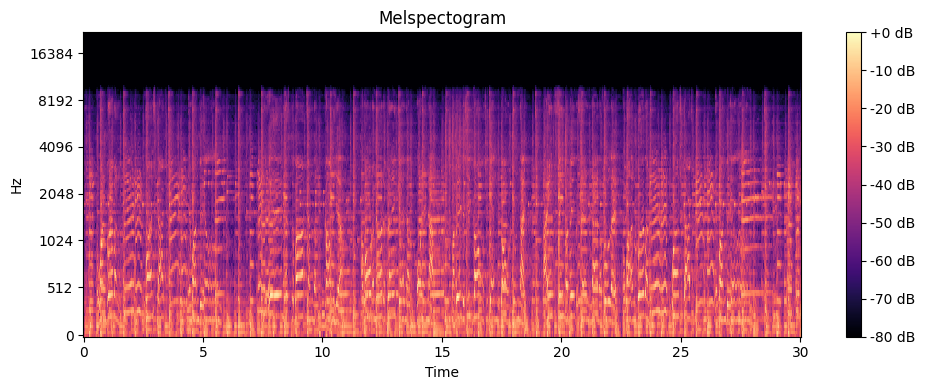

In [112]:
#For entire Audio
plot_melspectogram(y,sr)

In [113]:
def plot_melspectogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [114]:
random_file_name="./blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=50000)

(128, 391)


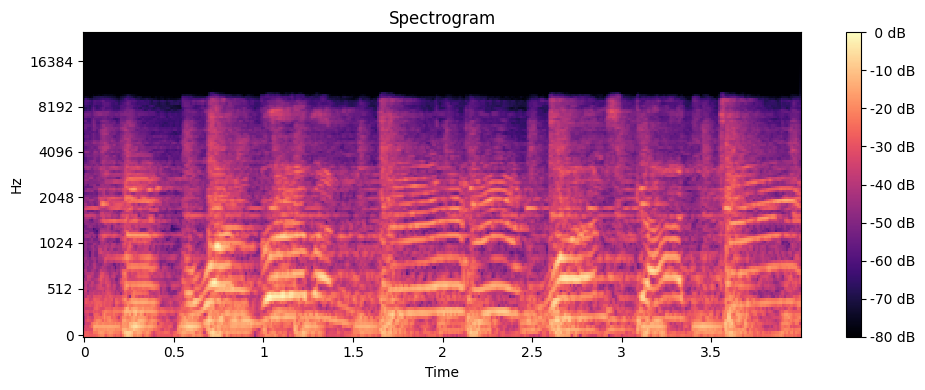

(128, 391)


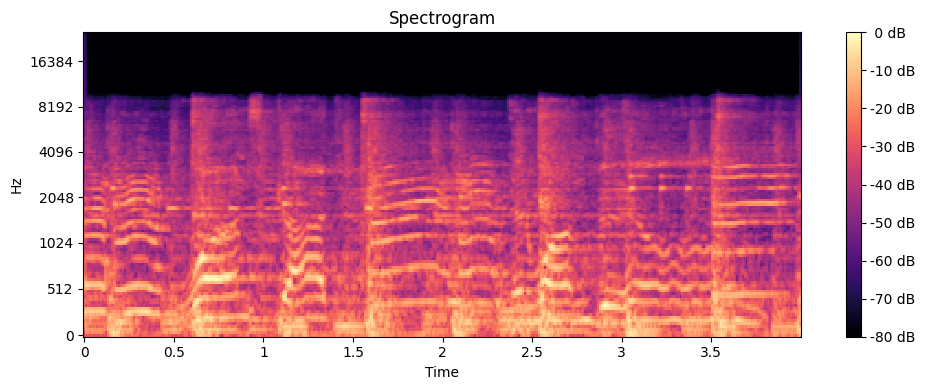

(128, 391)


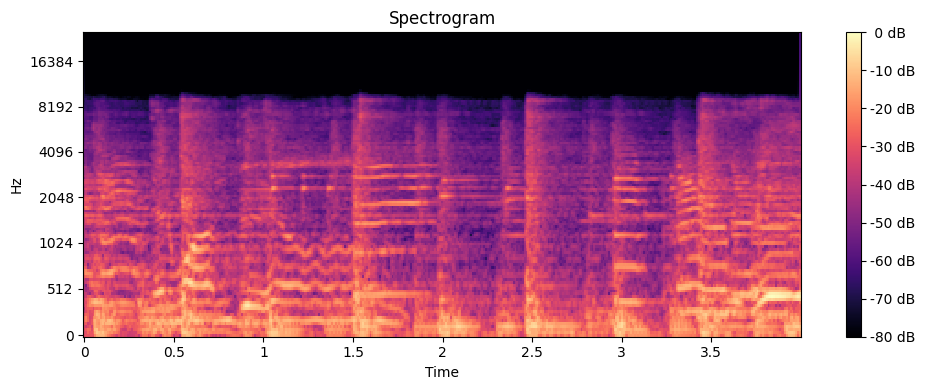

(128, 391)


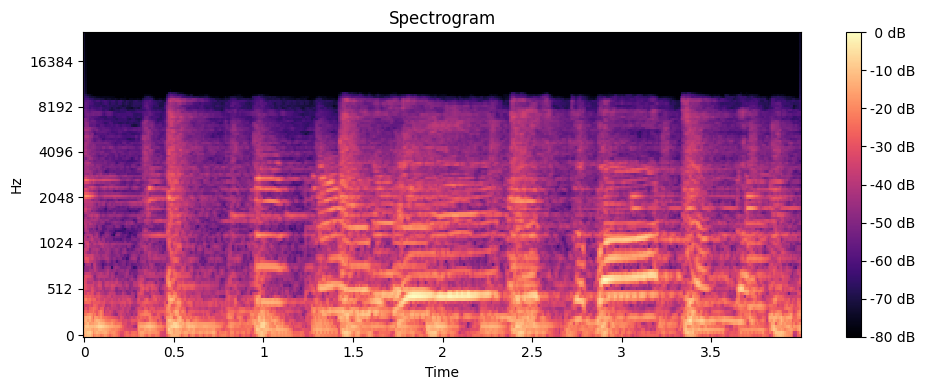

(128, 391)


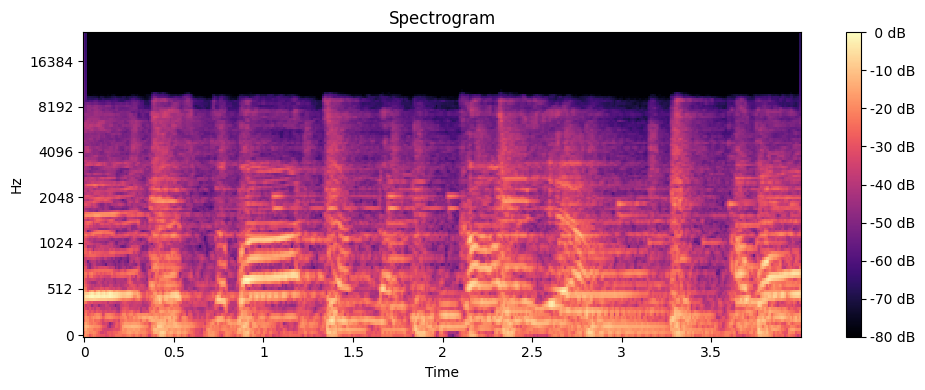

(128, 391)


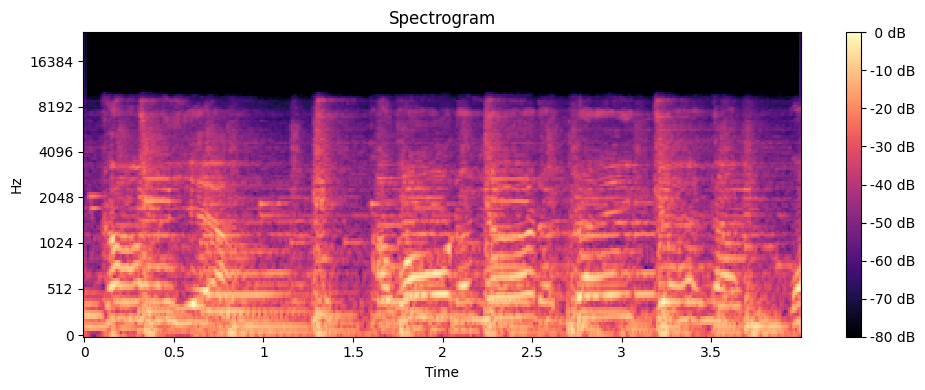

(128, 391)


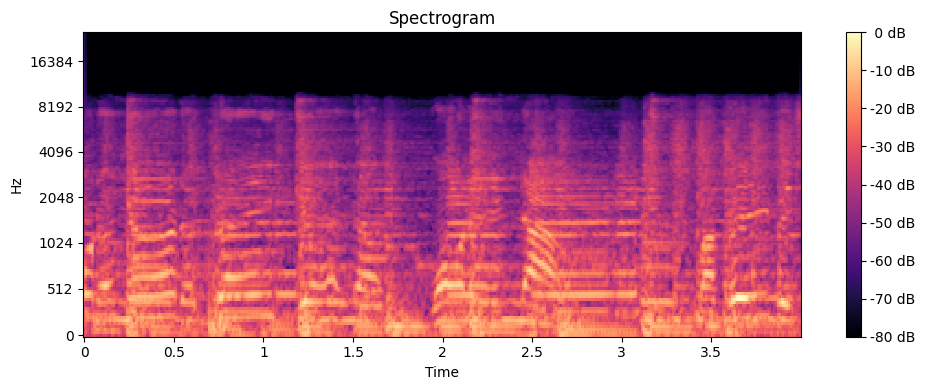

(128, 391)


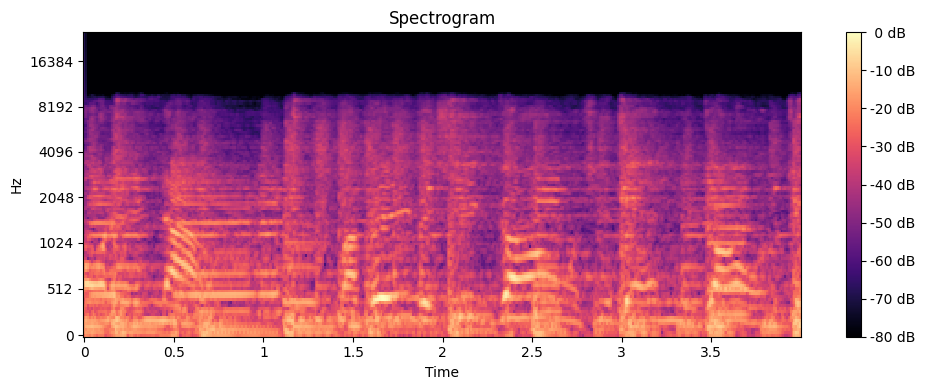

(128, 391)


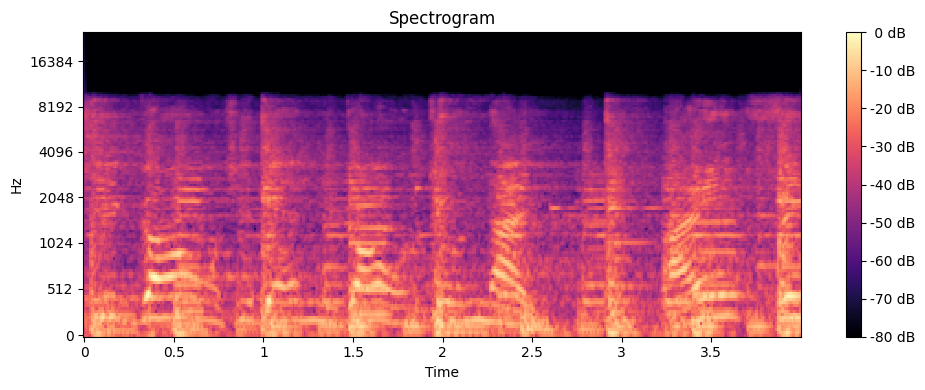

(128, 391)


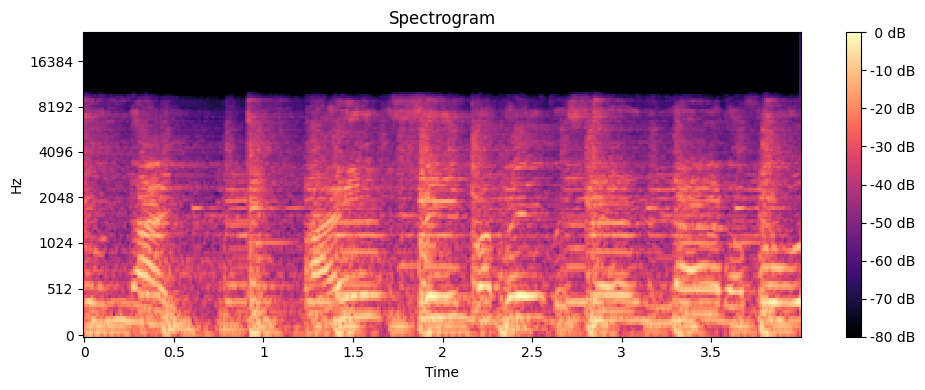

(128, 391)


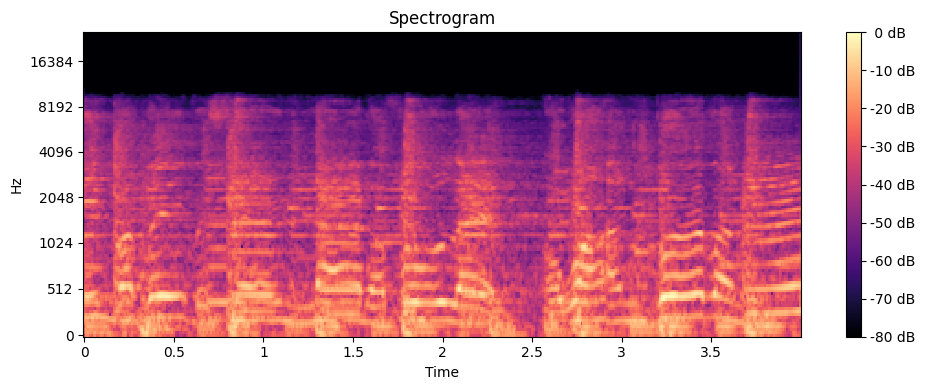

(128, 391)


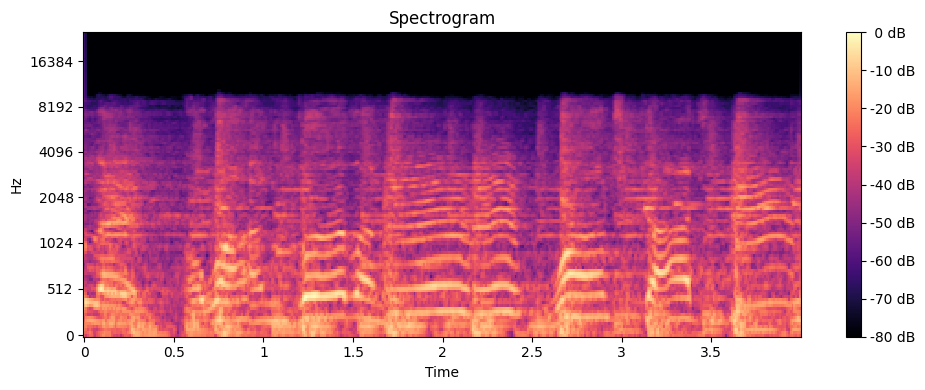

(128, 391)


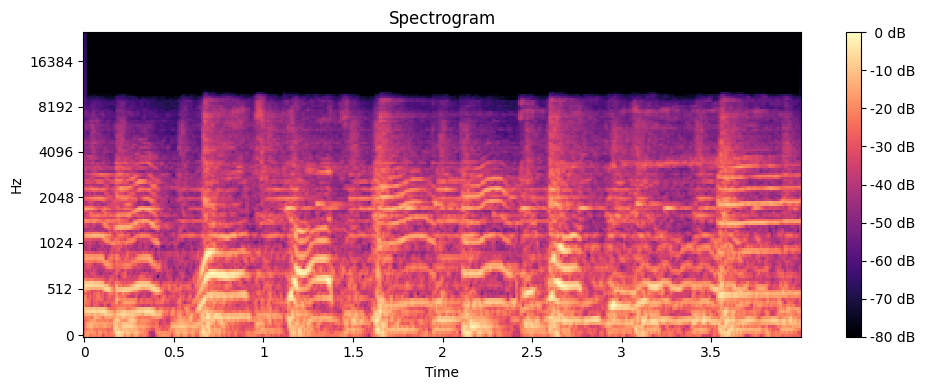

(128, 391)


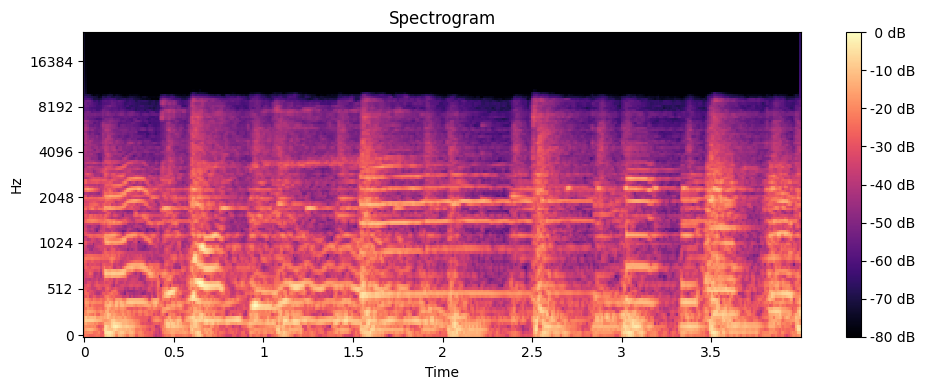

(128, 197)


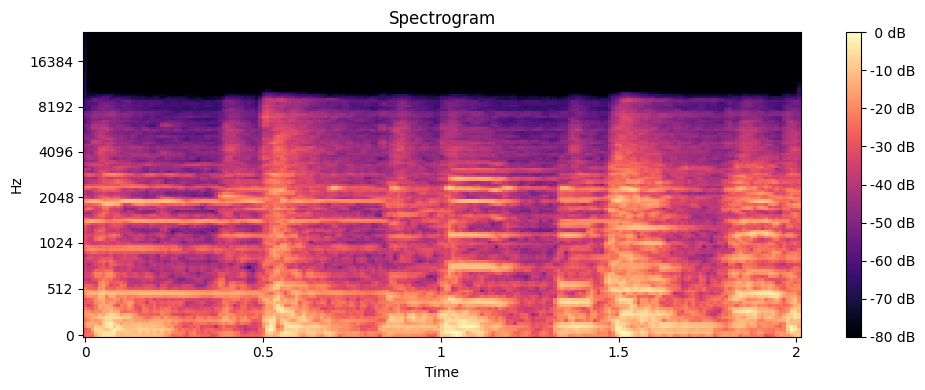

In [115]:
plot_melspectogram_chunks(y,sr)

In [116]:
data_dir = "./Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
#classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [119]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                #print(file_path)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2
                
                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
                
                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [120]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [121]:
data.shape

(14975, 150, 150, 1)

In [122]:
labels.shape

(14975,)

In [123]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [124]:
labels.shape

(14975, 10)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [126]:
model = tf.keras.models.Sequential()

In [127]:
X_train[0].shape

(150, 150, 1)

In [128]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [129]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [130]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [131]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [132]:
model.add(Dropout(0.3))

In [133]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [134]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [135]:
model.add(Dropout(0.3))

In [136]:
model.add(Flatten())

In [137]:
model.add(Dense(units=1200,activation='relu'))

In [138]:
model.add(Dropout(0.45))

In [139]:
model.add(Dense(units=len(classes),activation='softmax'))

In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                

In [141]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [142]:
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 [==============================] - 638s 2s/step - loss: 1.9505 - accuracy: 0.2865 - val_loss: 1.5674 - val_accuracy: 0.4267
Epoch 2/30
375/375 [==============================] - 446s 1s/step - loss: 1.4035 - accuracy: 0.5034 - val_loss: 1.1687 - val_accuracy: 0.5890
Epoch 3/30
375/375 [==============================] - 438s 1s/step - loss: 1.1330 - accuracy: 0.6009 - val_loss: 1.0144 - val_accuracy: 0.6524
Epoch 4/30
375/375 [==============================] - 477s 1s/step - loss: 0.9495 - accuracy: 0.6737 - val_loss: 0.9949 - val_accuracy: 0.6441
Epoch 5/30
375/375 [==============================] - 477s 1s/step - loss: 0.8084 - accuracy: 0.7250 - val_loss: 0.7271 - val_accuracy: 0.7556
Epoch 6/30
375/375 [==============================] - 476s 1s/step - loss: 0.6937 - accuracy: 0.7654 - val_loss: 0.7329 - val_accuracy: 0.7513
Epoch 7/30
375/375 [==============================] - 473s 1s/step - loss: 0.6048 - accuracy: 0.7942 - val_loss: 0.6420 - val_accuracy: 0.7970

In [143]:
model.save("Trained_model.h5")

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
training_history.history

{'loss': [1.950461983680725,
  1.4034510850906372,
  1.133043885231018,
  0.9495134353637695,
  0.8084284067153931,
  0.6936609745025635,
  0.6048496961593628,
  0.5070497393608093,
  0.4290940761566162,
  0.36720582842826843,
  0.32118552923202515,
  0.2745179831981659,
  0.23225660622119904,
  0.20500516891479492,
  0.1841018795967102,
  0.16465486586093903,
  0.13248558342456818,
  0.12337391823530197,
  0.11962087452411652,
  0.10254967212677002,
  0.07971595227718353,
  0.09203225374221802,
  0.08428069949150085,
  0.1039990484714508,
  0.07064638286828995,
  0.05834014713764191,
  0.10117287188768387,
  0.050618600100278854,
  0.06573161482810974,
  0.05719253420829773],
 'accuracy': [0.2864774763584137,
  0.5034223794937134,
  0.600918173789978,
  0.6737061738967896,
  0.7249582409858704,
  0.7653589248657227,
  0.794240415096283,
  0.8275458812713623,
  0.8585141897201538,
  0.8770450949668884,
  0.8920701146125793,
  0.9086811542510986,
  0.9212854504585266,
  0.92996662855148

In [145]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [146]:
X_train

array([[[[3.23949524e+02],
         [1.30654617e+02],
         [6.70345402e+00],
         ...,
         [4.34789562e+00],
         [3.36882553e+01],
         [7.33191986e+01]],

        [[6.42828613e+02],
         [3.44813232e+02],
         [2.40324974e+01],
         ...,
         [5.41547890e+01],
         [1.88378052e+02],
         [2.72046265e+02]],

        [[4.72280457e+02],
         [2.40645081e+02],
         [2.22441921e+01],
         ...,
         [1.06598343e+02],
         [3.56269043e+02],
         [2.67052490e+02]],

        ...,

        [[2.59430637e-03],
         [5.44528186e-04],
         [3.36275771e-05],
         ...,
         [2.45642987e-05],
         [3.06418842e-05],
         [6.99046286e-05]],

        [[2.57155253e-03],
         [5.25189156e-04],
         [2.95105224e-06],
         ...,
         [2.10841904e-06],
         [6.14958935e-06],
         [5.34490428e-05]],

        [[2.54536560e-03],
         [5.17699809e-04],
         [7.90506220e-08],
         ...,
 

In [147]:
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                

In [148]:
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [149]:
training_history_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [150]:
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 [==============================] - 114s 302ms/step - loss: 0.0388 - accuracy: 0.9856


In [151]:
train_loss,train_accuracy

(0.03882511332631111, 0.9855592846870422)

In [152]:
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 [==============================] - 34s 361ms/step - loss: 0.4310 - accuracy: 0.8978


In [153]:
val_loss,val_accuracy

(0.43098822236061096, 0.8978297114372253)

In [154]:
training_history_data['val_loss']

[1.5674492120742798,
 1.168718934059143,
 1.014398455619812,
 0.9949014782905579,
 0.7270811796188354,
 0.7328711152076721,
 0.6420474648475647,
 0.624905526638031,
 0.5122266411781311,
 0.45421454310417175,
 0.4329581558704376,
 0.44372278451919556,
 0.40572986006736755,
 0.39284956455230713,
 0.4907071590423584,
 0.37998461723327637,
 0.45575910806655884,
 0.3859716057777405,
 0.3715001940727234,
 0.4697466194629669,
 0.4266771972179413,
 0.4582805931568146,
 0.4412519931793213,
 0.3463996946811676,
 0.43341660499572754,
 0.5805440545082092,
 0.40247756242752075,
 0.3736549913883209,
 0.44532713294029236,
 0.43098822236061096]

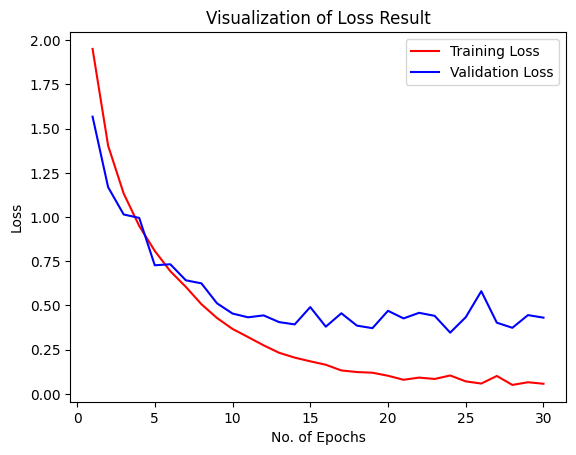

In [155]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

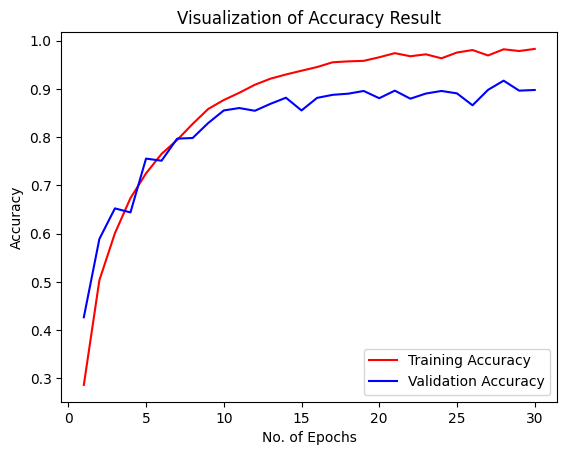

In [156]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [157]:
X_test.shape

(2995, 150, 150, 1)

In [158]:
y_pred = model.predict(X_test)
y_pred

94/94 [==============================] - 29s 310ms/step


array([[9.9820041e-05, 1.1056831e-08, 4.1696916e-05, ..., 9.8905259e-01,
        6.0068065e-05, 2.2628603e-03],
       [1.6389430e-10, 5.3369223e-17, 2.5744348e-13, ..., 2.8434406e-16,
        4.6285810e-13, 5.8236396e-06],
       [3.0258471e-09, 5.7845101e-10, 3.6629240e-09, ..., 1.5919659e-09,
        3.4335496e-10, 2.4795083e-03],
       ...,
       [9.9777359e-01, 2.3258024e-16, 2.2258686e-03, ..., 8.3318819e-15,
        3.8901715e-10, 4.8225201e-07],
       [4.4415694e-05, 9.9510586e-01, 4.5806787e-04, ..., 1.8633856e-04,
        1.7237986e-03, 1.6966819e-04],
       [3.1006195e-05, 1.7032328e-08, 6.2413965e-05, ..., 2.2144080e-04,
        5.9017634e-01, 7.0023411e-03]], dtype=float32)

In [159]:
y_pred.shape

(2995, 10)

In [160]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 8], dtype=int64)

In [161]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [162]:
Y_test.shape

(2995, 10)

In [163]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [164]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [165]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.94      0.88      0.91       302
   classical       0.91      0.97      0.94       298
     country       0.77      0.90      0.83       317
       disco       0.85      0.94      0.89       312
      hiphop       0.91      0.95      0.93       277
        jazz       0.98      0.80      0.88       311
       metal       0.99      0.92      0.95       302
         pop       0.96      0.86      0.91       289
      reggae       0.87      0.93      0.90       296
        rock       0.85      0.84      0.84       291

    accuracy                           0.90      2995
   macro avg       0.90      0.90      0.90      2995
weighted avg       0.90      0.90      0.90      2995



In [166]:
cm

array([[266,   0,  18,   6,   1,   2,   0,   2,   3,   4],
       [  3, 289,   3,   1,   0,   2,   0,   0,   0,   0],
       [  3,   2, 284,   7,   0,   0,   1,   1,   4,  15],
       [  0,   1,   0, 294,   2,   0,   0,   1,  11,   3],
       [  0,   2,   1,   2, 263,   0,   2,   0,   7,   0],
       [  6,  19,  29,   0,   0, 248,   0,   1,   8,   0],
       [  0,   0,   4,   3,   2,   0, 278,   1,   0,  14],
       [  3,   2,   6,   8,  10,   1,   0, 248,   4,   7],
       [  2,   1,   6,   5,   6,   0,   0,   0, 276,   0],
       [  0,   1,  16,  20,   4,   0,   1,   3,   3, 243]], dtype=int64)

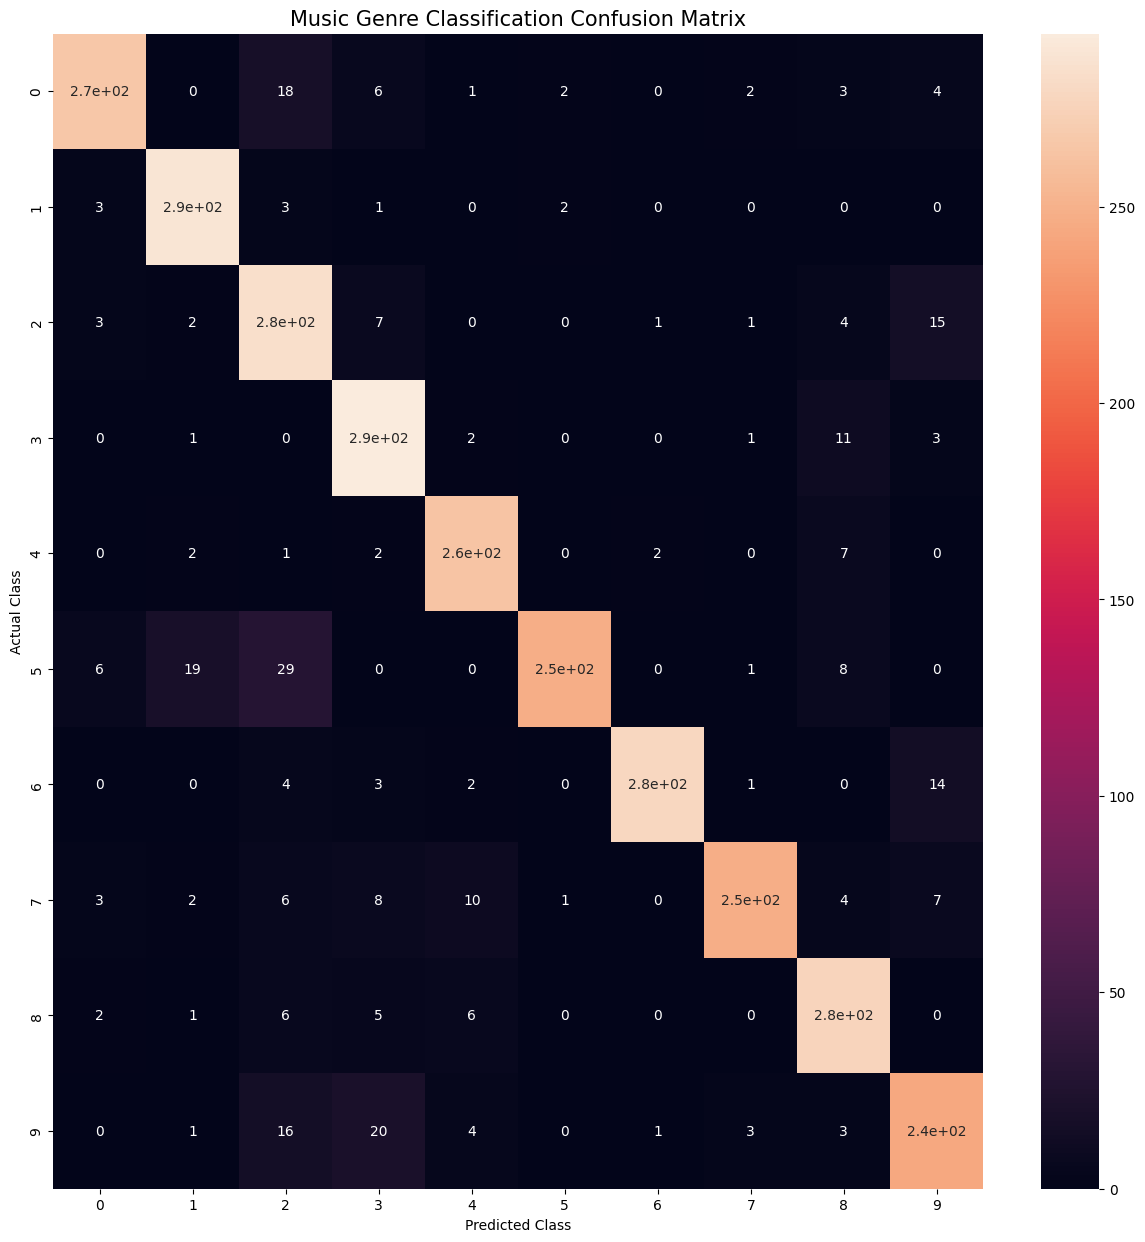

In [167]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()